<script>
  jQuery(document).ready(function($) {  
  
 $(window).load(function(){
    $('#preloader').fadeOut('slow',function(){$(this).remove();});
  });
  
  });
</script>

<style type="text/css">
div#preloader { position: fixed; 
      left: 0; 
      top: 0; 
      z-index: 999; 
      width: 100%; 
      height: 100%; 
      overflow: visible; 
      background: #fff url('http://preloaders.net/preloaders/720/Moving%20line.gif') no-repeat center center; 
  }

</style>

<div id="preloader">

</div>

# Spark Reddit Project

This project is an analysis of ~30GB of Reddit data. It was inspired by Insight Data Science Labs. I used Spark and pyspark to perform the heavy lifting. I set up the cluster on AWS using pegasus. I used 4 large instances with 3 worker nodes.

For a quick introduction to Reddit take a look at:
    
http://mashable.com/2012/06/06/reddit-for-beginners/#dMRqb5dNviqn

In [15]:
%pylab inline
from pyspark.sql.types import *  

Populating the interactive namespace from numpy and matplotlib


Read in the data from May 2015.

In [21]:
fields = [StructField("archived", BooleanType(), True),  
          StructField("author", StringType(), True),
          StructField("author_flair_css_class", StringType(), True),
          StructField("body", StringType(), True),
          StructField("controversiality", LongType(), True),
          StructField("created_utc", StringType(), True),
          StructField("distinguished", StringType(), True),
          StructField("downs", LongType(), True),
          StructField("edited", StringType(), True),
          StructField("gilded", LongType(), True),
          StructField("id", StringType(), True),
          StructField("link_id", StringType(), True),
          StructField("name", StringType(), True),
          StructField("parent_id", StringType(), True),
          StructField("retrieved_on", LongType(), True),
          StructField("score", LongType(), True),
          StructField("score_hidden", BooleanType(), True),
          StructField("subreddit", StringType(), True),
          StructField("subreddit_id", StringType(), True),
          StructField("ups", LongType(), True)]

rawDF = sqlContext.read.json("s3a://reddit-comments/2015/RC_2015-05", StructType(fields)).persist(StorageLevel.MEMORY_AND_DISK_SER).registerTempTable("comments")

SQL query to gab 5 rows of data.

In [25]:
first_5 = sqlContext.sql("""  
    SELECT *
    FROM comments
    LIMIT 5
    """)

Convert the dataframe to a pandas dataframe and display the first two rows.

In [37]:
df = first_5.toPandas()

In [41]:
df.head(2)

,archived,author,author_flair_css_class,body,controversiality,created_utc,distinguished,downs,edited,gilded,id,link_id,name,parent_id,retrieved_on,score,score_hidden,subreddit,subreddit_id,ups
0,False,DingleBerryCobbler,None,Ah I thought the neighbor's dog would be shock...,0,1430440451,None,0,false,0,cquhi3b,t3_34eabd,t1_cquhi3b,t1_cqugsm8,1432703669,1,False,dogs,t5_2qhhk,1
1,False,[deleted],None,[deleted],0,1430440451,None,0,false,0,cquhi3c,t3_34f72d,t1_cquhi3c,t3_34f72d,1432703669,1,False,blog,t5_2qh49,1


View the full comment in the first row.

In [40]:
df.loc[0,'body']

u"Ah I thought the neighbor's dog would be shocked/wearing it. What if the neighbor's dog gets through the hole?"

SQL query to find out how many unique authors are there in each sub Reddit.

In [22]:
distinct_gilded_authors_by_subreddit = sqlContext.sql("""  
    SELECT subreddit, COUNT(DISTINCT author) as authors
    FROM comments
    WHERE gilded > 0
    GROUP BY subreddit
    ORDER BY authors DESC
    """)

In [23]:
distinct_gilded_authors_by_subreddit.take(5)

[Row(subreddit=u'AskReddit', authors=2677),
 Row(subreddit=u'funny', authors=506),
 Row(subreddit=u'pics', authors=459),
 Row(subreddit=u'videos', authors=379),
 Row(subreddit=u'news', authors=355)]

Plot of subreddit vs number of unique authors. We see that AskReddit is the most popular, but funny and pics are up there.

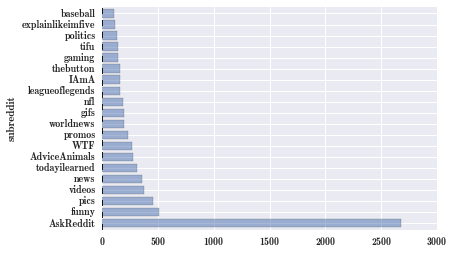

In [33]:
gilded_authors = distinct_gilded_authors_by_subreddit.toPandas()  
gilded_authors[:20].plot(x='subreddit', y='authors', kind='barh', alpha=0.5)

SQL query to find out what the average score of a comment is in for each subreddit.

In [29]:
average_score_by_subreddit = sqlContext.sql("""  
    SELECT subreddit, AVG(score) as avg_score
    FROM comments
    GROUP BY subreddit
    ORDER BY avg_score DESC
    """)


In [30]:
average_score_by_subreddit.take(5)

[Row(subreddit=u'karlsruhe', avg_score=73.3157894736842),
 Row(subreddit=u'picturesofiansleeping', avg_score=22.92391304347826),
 Row(subreddit=u'photoshopbattles', avg_score=21.04499959532738),
 Row(subreddit=u'behindthegifs', avg_score=20.62438118811881),
 Row(subreddit=u'IAmA', avg_score=18.381243801552937)]

Plot of subreddit vs average score. We see that karlsrube is way a head of the others. It would be interesting to see to compare number of unique authors to average score.

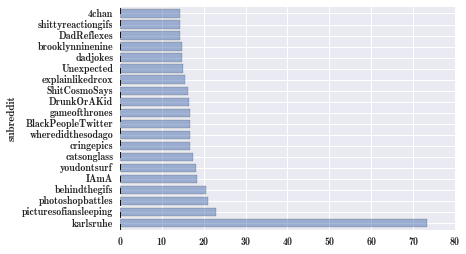

In [32]:
subreddit_score = average_score_by_subreddit.toPandas()  
subreddit_score[:20].plot(x='subreddit', y='avg_score', kind='barh', alpha=0.5)  

Further work would look at using NLP to analyze the text of the comment body and perhaps using some machine learning to predict comment score.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>

<footer id="attribution" style="float:left; color:#999; background:#fff;">
Author: Dyfrig Mon
</footer>